In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import acquire as acq
import prepare as prep
from prepare import *

In [3]:
total_df = prep.prep_telco(acq.get_telco_data())

In [4]:
look = acq.peekatdata(total_df)
look

HEAD:
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 1  0003-MKNFE   
1                4                         1                 1  0013-MHZWF   
2                1                         1                 1  0015-UOCOJ   
3                1                         1                 1  0023-HGHWL   
4                3                         1                 1  0032-PGELS   

   gender  senior_citizen partner dependents  tenure phone_service  \
0    Male               0      No         No       9           Yes   
1  Female               0      No        Yes       9           Yes   
2  Female               1      No         No       7           Yes   
3    Male               1      No         No       1            No   
4  Female               0     Yes        Yes       1            No   

             ...            tv_encode streaming_services  \
0            ...                    0       

In [5]:
#acq.peekatdata(df)
#df.head()

In [6]:
total_df.shape

(7032, 38)

In [7]:
total_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'tenure_yearly', 'churn_encode', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode'],
      dtype='object')

In [8]:
df = total_df

In [9]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- payment_type_id ---
1    2365
2    1604
3    1542
4    1521
Name: payment_type_id, dtype: int64
---- internet_service_type_id ---
2    3096
1    2416
0    1520
Name: internet_service_type_id, dtype: int64
---- contract_type_id ---
1    3875
3    1685
2    1472
Name: contract_type_id, dtype: int64
---- customer_id ---
4890-VMUAV    1
7047-YXDMZ    1
5183-SNMJQ    1
7919-ZODZZ    1
9938-PRCVK    1
3969-JQABI    1
8819-WFGGJ    1
5345-BMKWB    1
4923-ADWXJ    1
4236-XPXAV    1
9617-INGJY    1
1241-FPMOF    1
1839-UMACK    1
1228-FZFRV    1
4316-XCSLJ    1
1518-VOWAV    1
1751-NCDLI    1
6865-JZNKO    1
9342-VNIMQ    1
1699-TLDLZ    1
8627-EHGIP    1
8444-WRIDW    1
2056-EVGZL    1
9030-QGZNL    1
6379-RXJRQ    1
9820-RMCQV    1
9948-YPTDG    1
2657-VPXTA    1
2233-TXSIU    1
6734-CKRSM    1
             ..
7854-EDSSA    1
1956-YIFGE    1
8944-AILEF    1
2810-FTLEM    1
8016-NCFVO    1
5095-ETBRJ    1
9253-QXKBE    1
1447-PJGGA    1
5171-EPLKN    1
8735-DCXNF    1
9026-RNUJS    1
8345

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
paperless_billing           7032 non-null object
monthly_charges 

In [25]:
df_just_nums = df[['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'churn_encode', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode']]

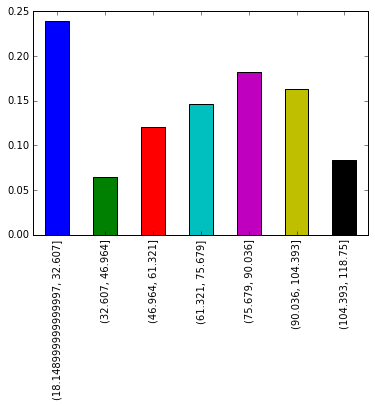

In [26]:
df_just_nums.monthly_charges.value_counts(normalize=True, sort=False, bins=7).plot.bar()

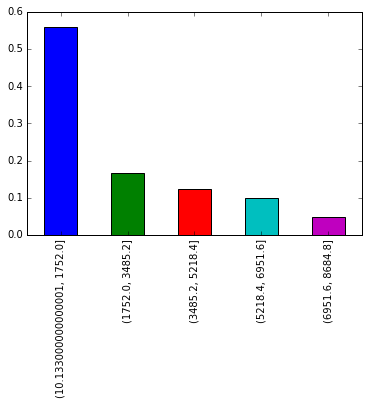

In [27]:
df_just_nums.total_charges.value_counts(normalize=True, sort=False, bins=5).plot.bar()

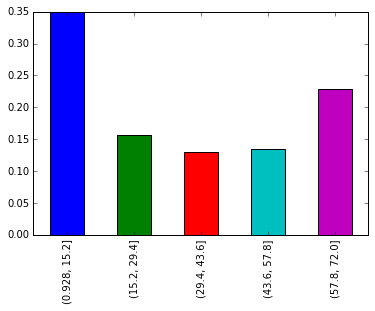

In [28]:
df_just_nums.tenure.value_counts(normalize=True, sort=False, bins=5).plot.bar()

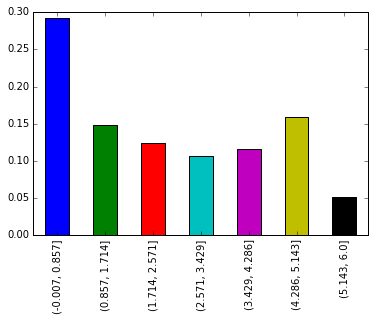

In [29]:
df_just_nums.tenure_yearly.value_counts(normalize=True, sort=False, bins=7).plot.bar()

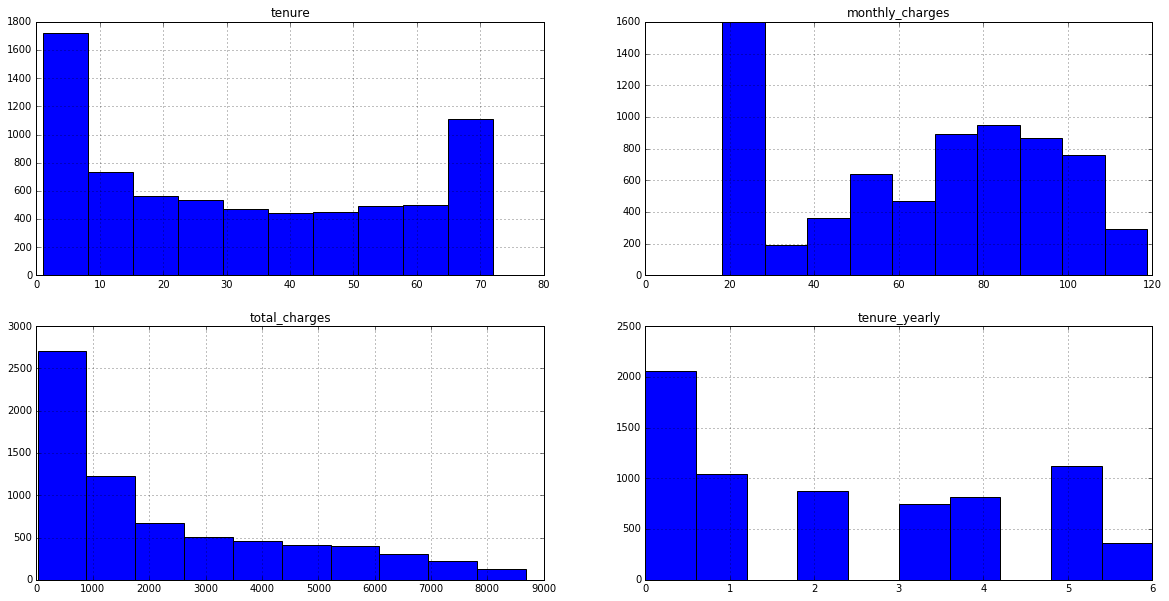

In [30]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = df_just_nums[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=False)

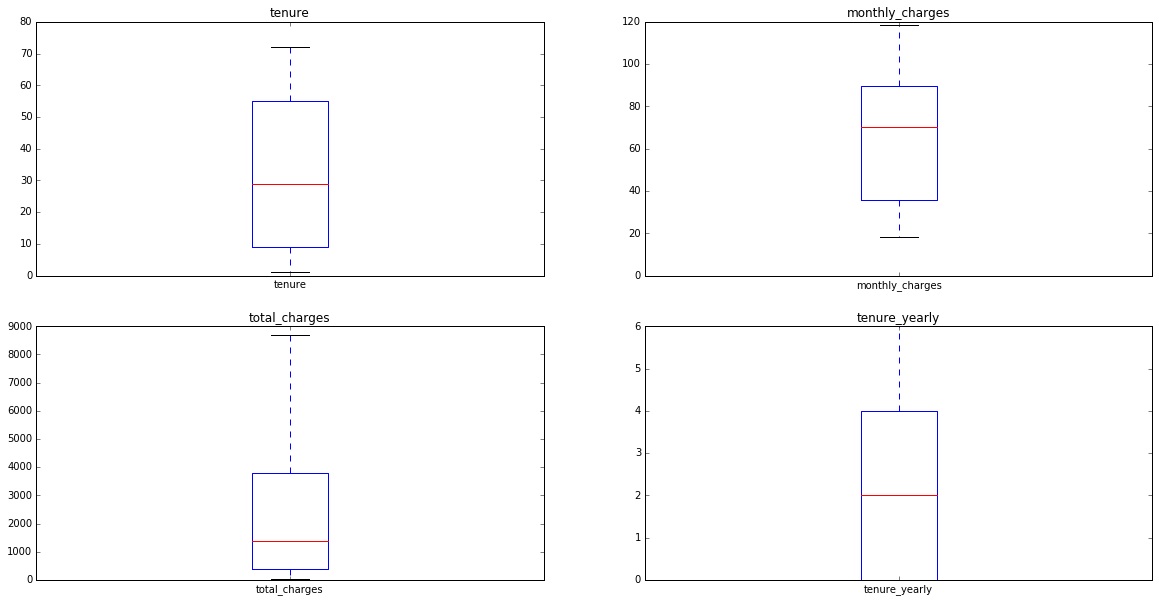

In [31]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = df_just_nums[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.plot.box()#logy=True)

## Split into X's, y's and Train/Tests

In [32]:
X = df_just_nums.drop(['churn_encode'], axis=1)
y = df_just_nums[['churn_encode']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 123)

In [33]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode', 'streaming_services', 'online_security_encode', 'online_backup_encode', 'online_security_backup', 'household_type_id', 'gender_encode', 'paperless_billing_encode', 'tech_support_encode', 'device_protection_encode', 'churn_encode']
Train dimensions (rows, columns): (4922, 22)


Test columns:  ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode', 'streaming_services', 'online_security_encode', 'online_backup_encode', 'online_security_backup', 'household_type_id', 'gender_encode', 'paperless_billing_encode', 'tech_support_encode', 'device_protection_encode', 'churn_encode']
Test dimensions (rows, columns): (2110, 22)


In [34]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.70
Test Split: 0.30


In [35]:
X_train, X_test = scale_split_data(X_train, X_test)

In [36]:
train.columns

Index(['customer_id', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'phone_id', 'movies_encode',
       'tv_encode', 'streaming_services', 'online_security_encode',
       'online_backup_encode', 'online_security_backup', 'household_type_id',
       'gender_encode', 'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode', 'churn_encode'],
      dtype='object')

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


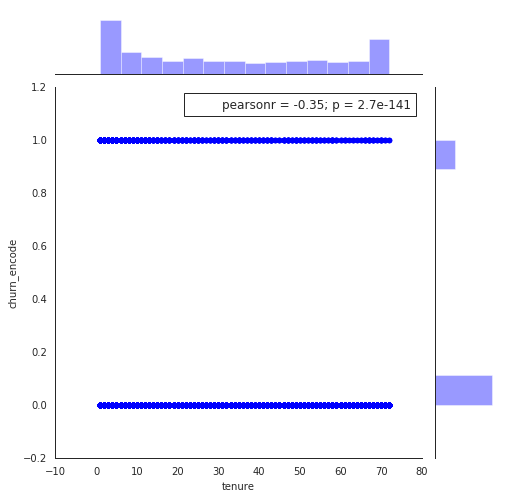

In [37]:
with sns.axes_style('white'):
    j = sns.jointplot('tenure', 'churn_encode', data=train, kind='scatter', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

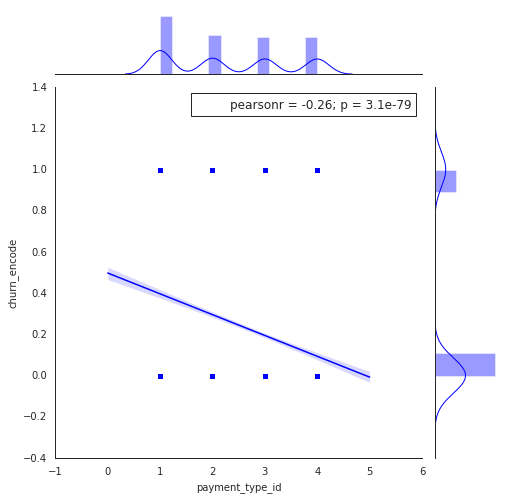

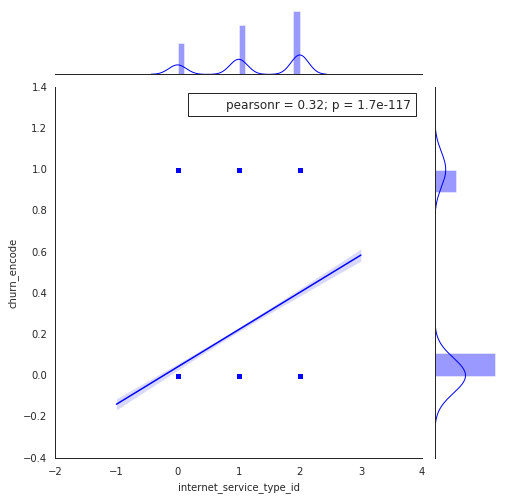

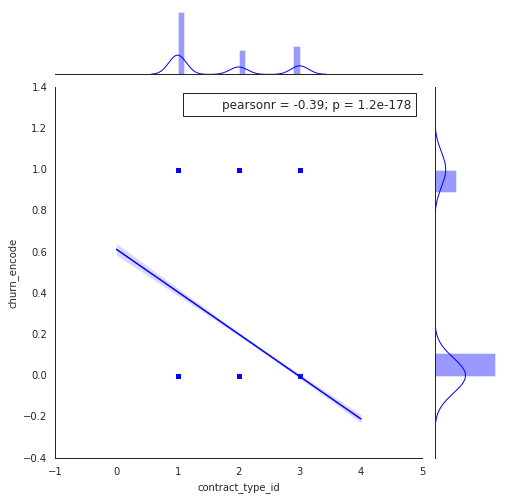

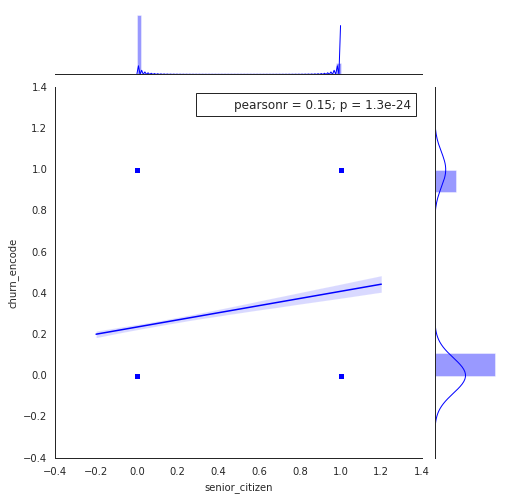

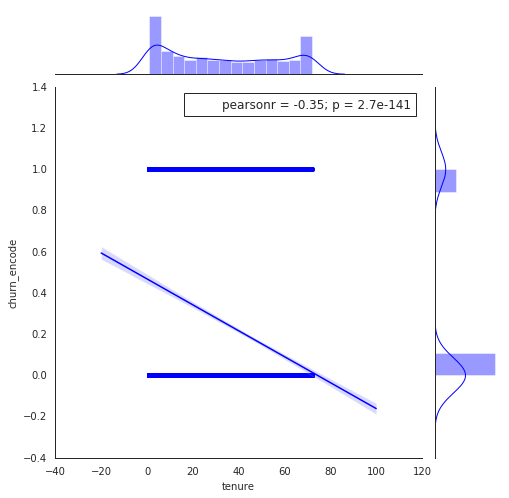

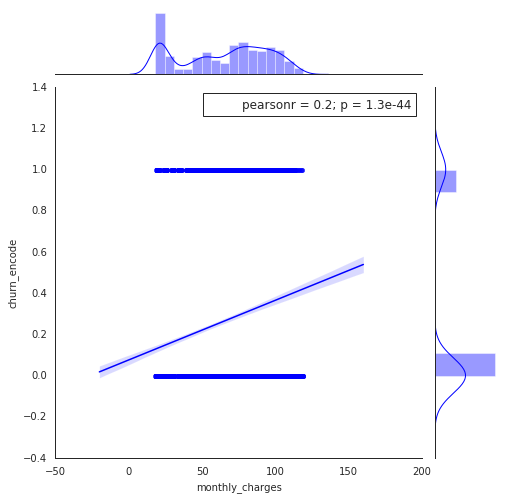

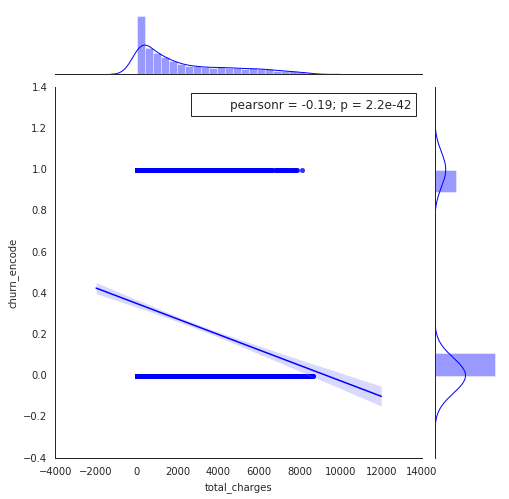

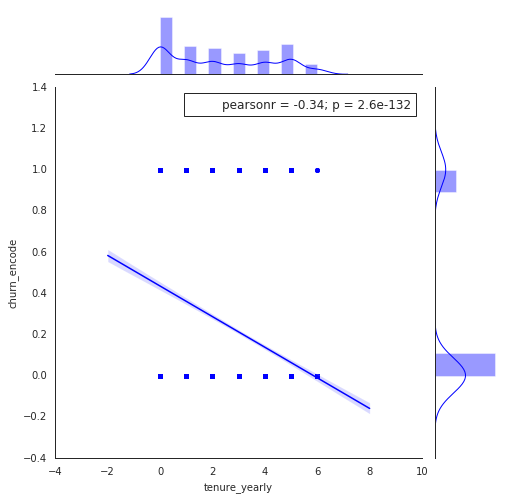

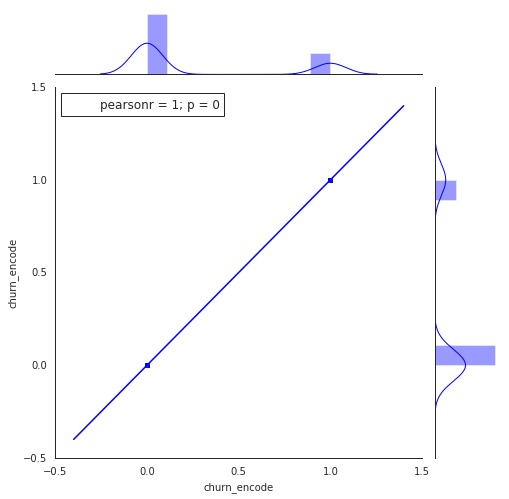

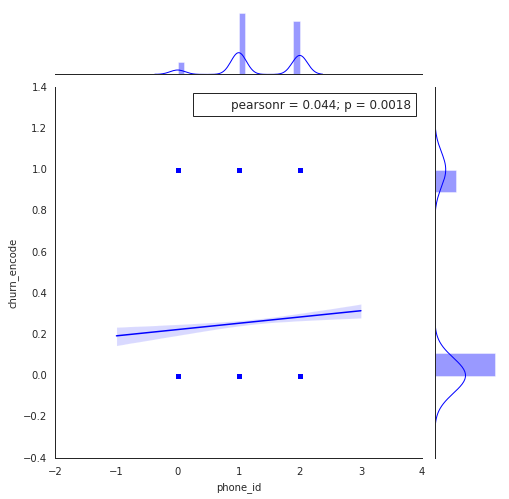

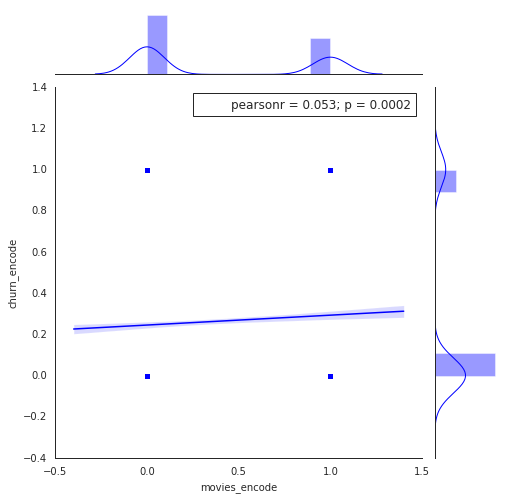

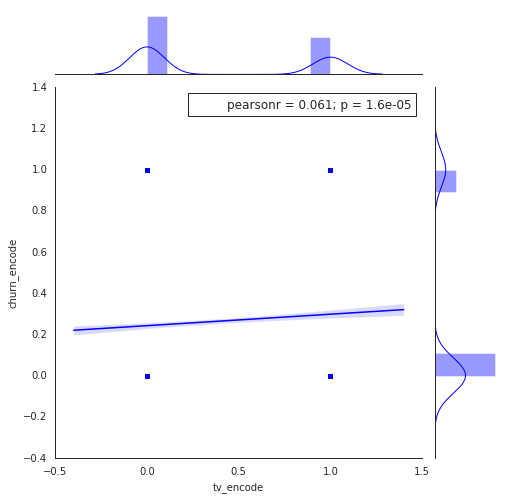

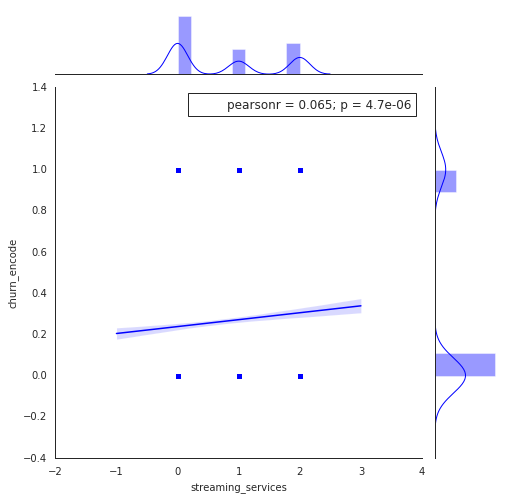

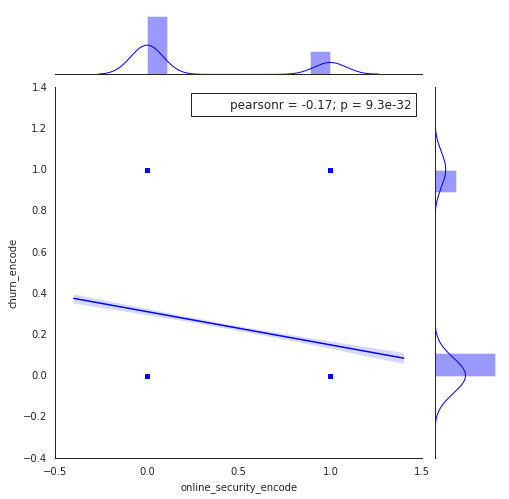

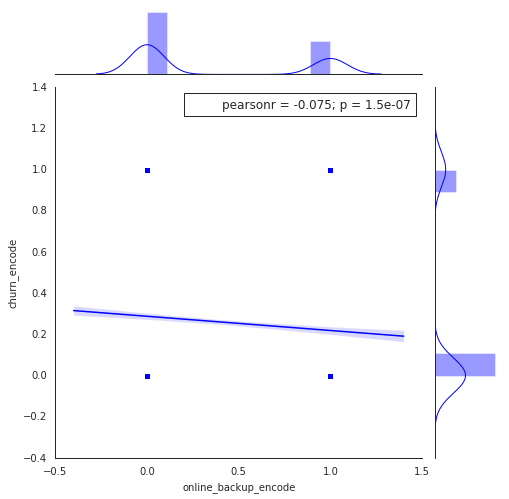

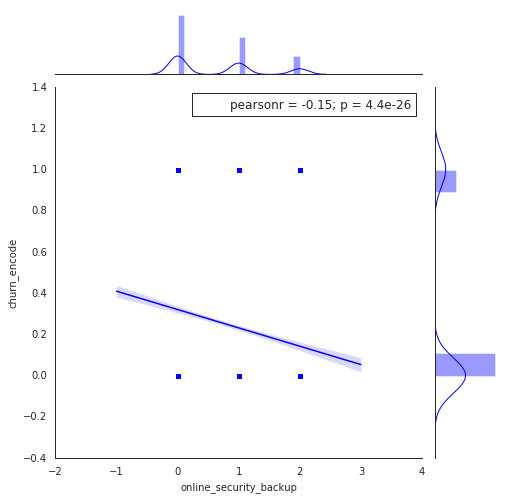

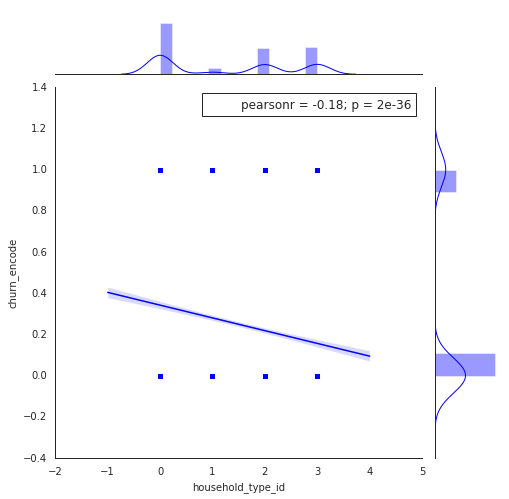

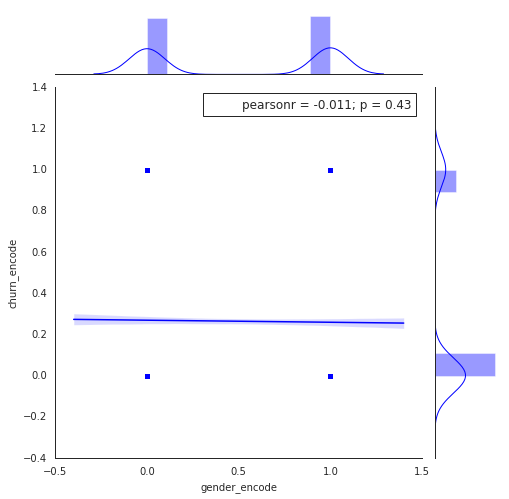

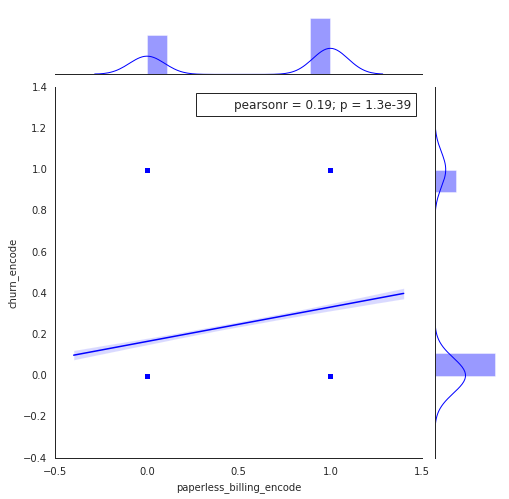

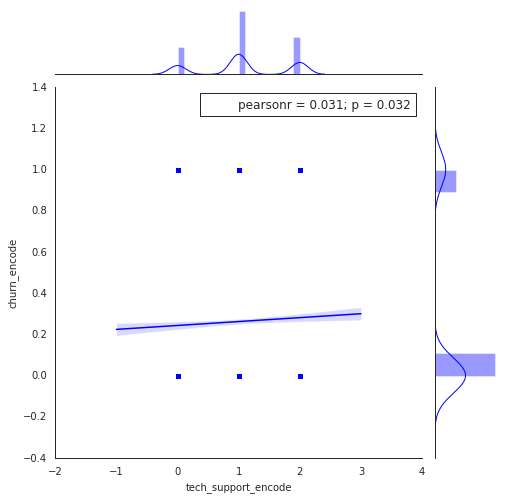

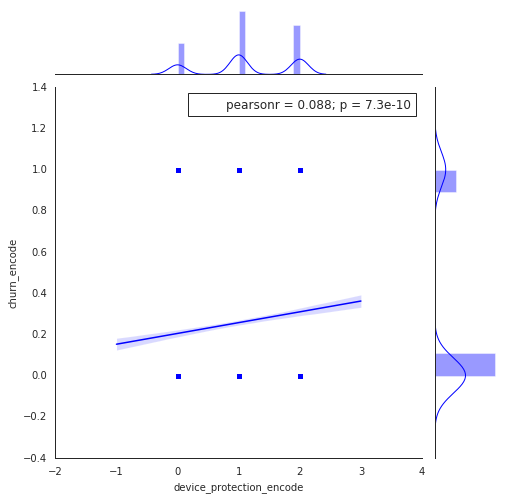

In [38]:
for i, col in enumerate(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'churn_encode', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode']):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'churn_encode', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

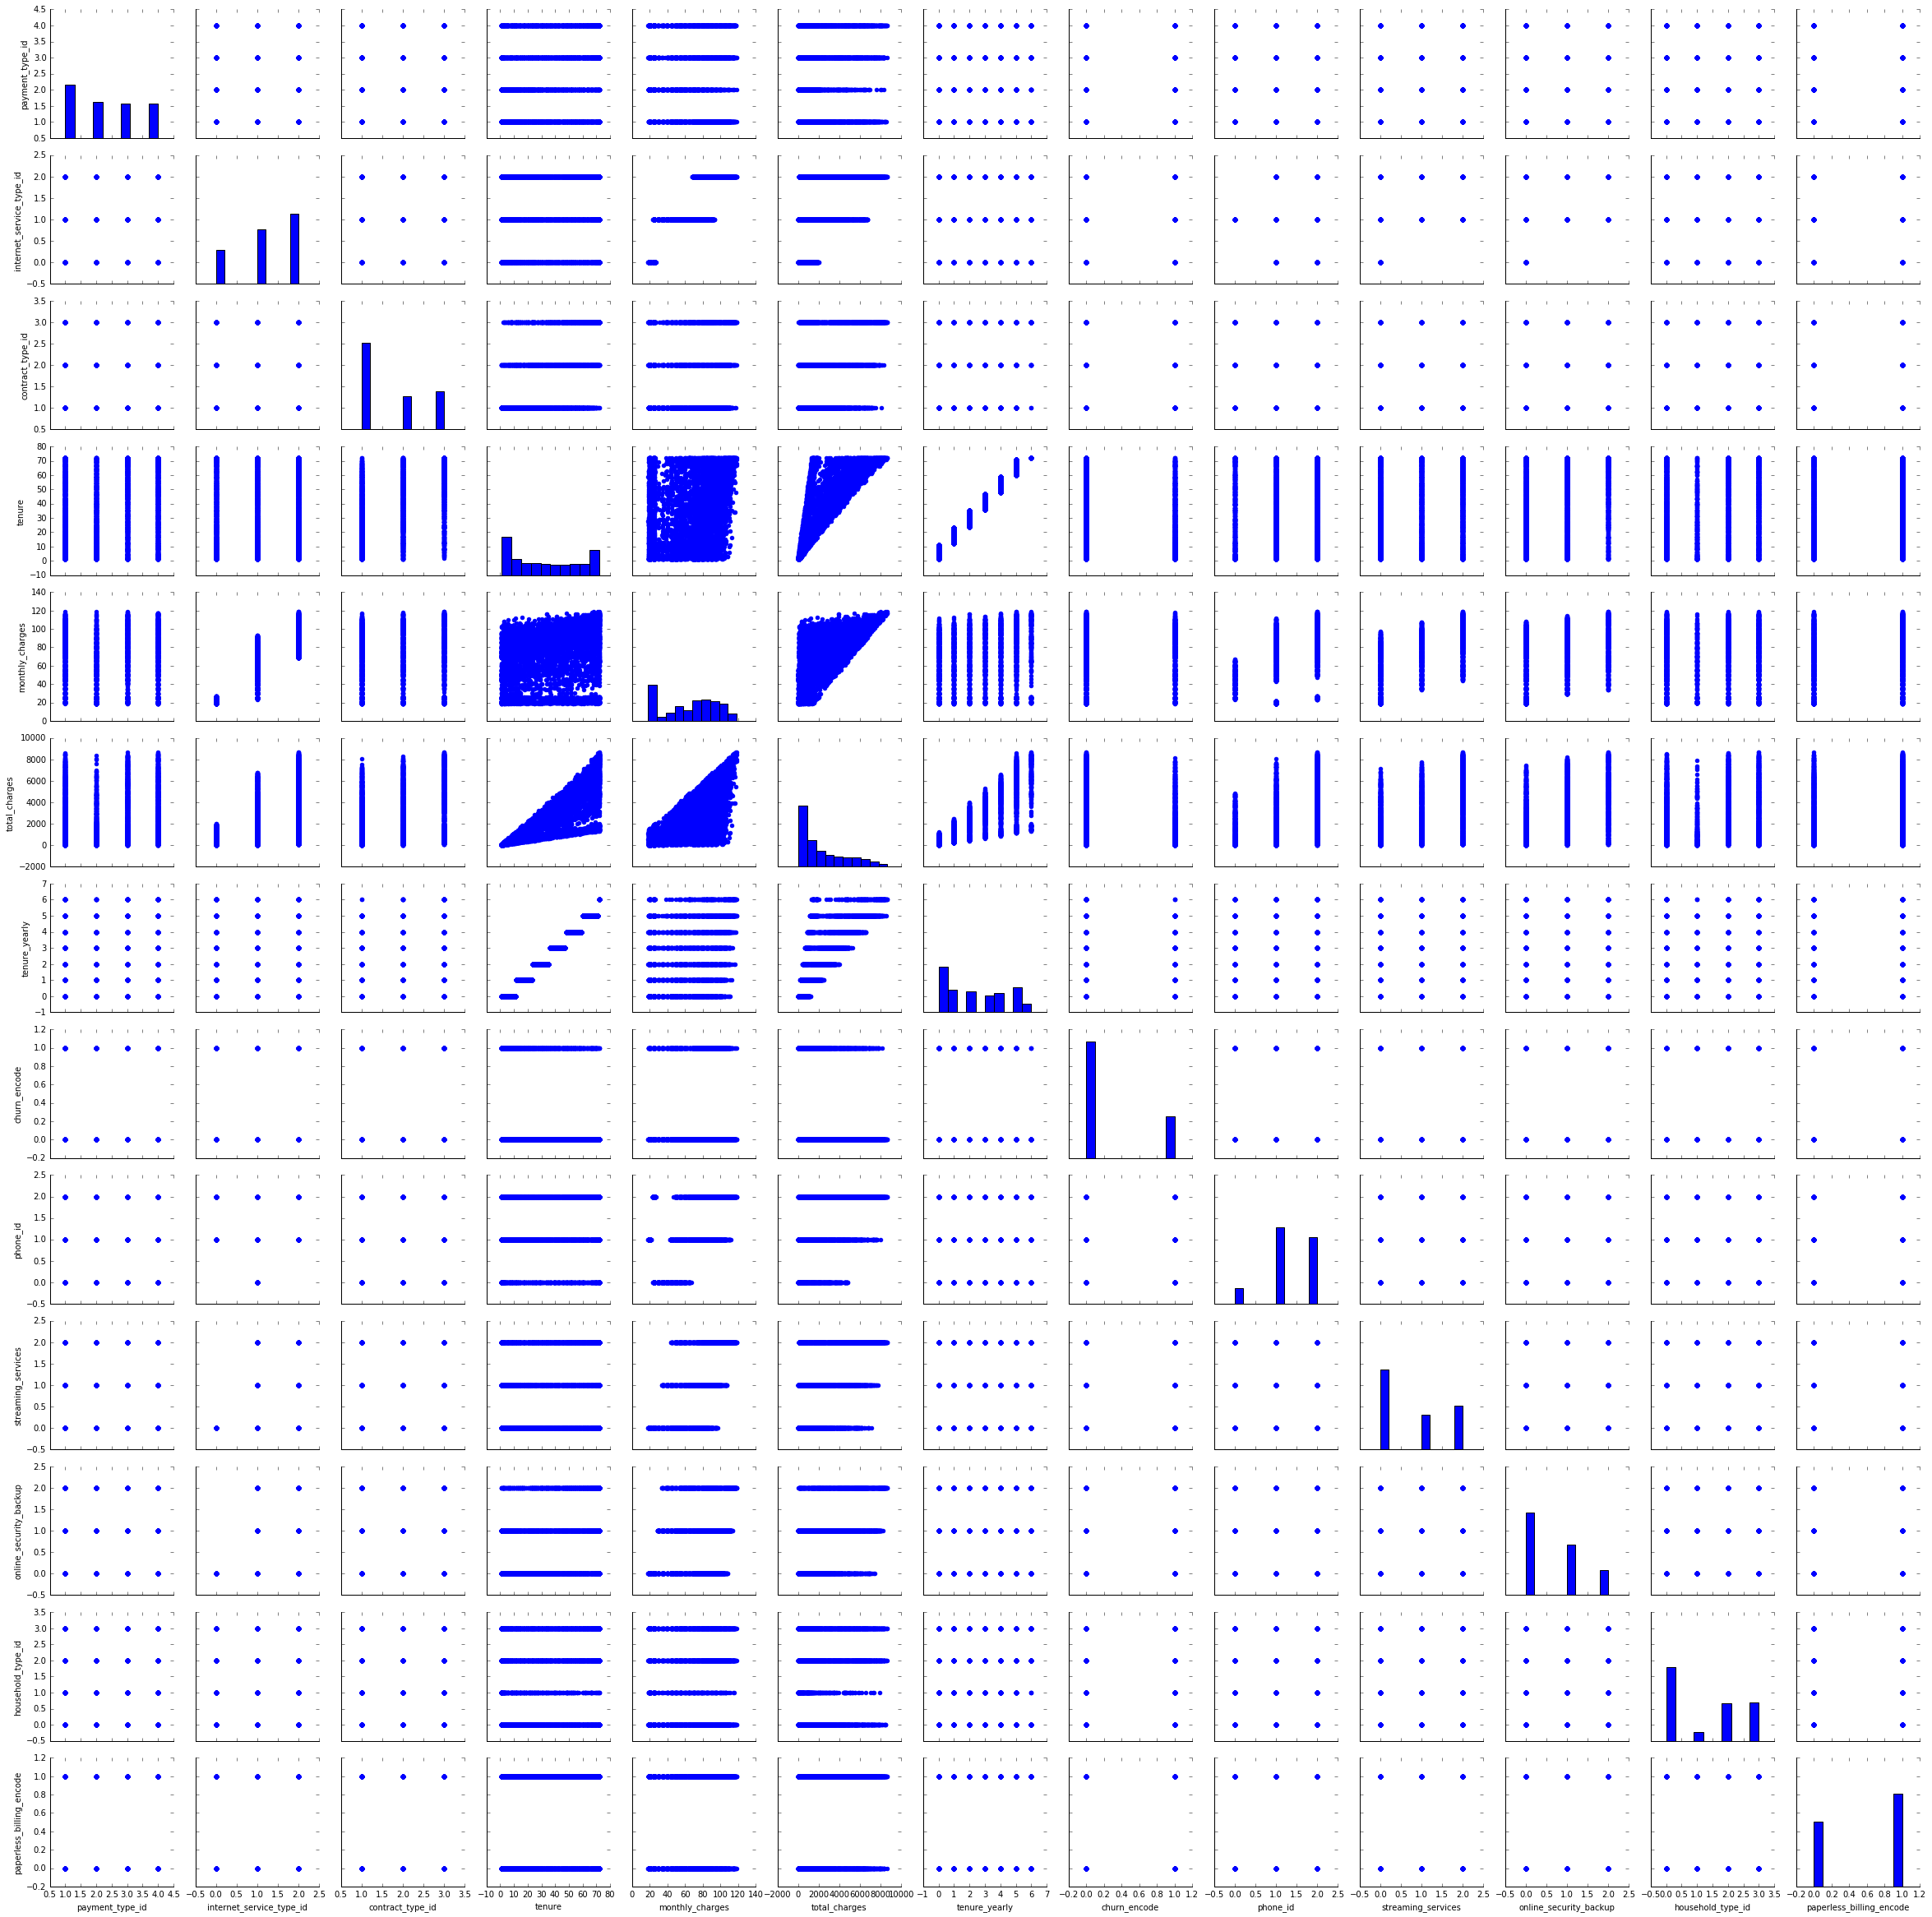

In [39]:
g = sns.PairGrid(train[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'churn_encode', 'phone_id',
       'streaming_services', 'online_security_backup', 'household_type_id', 'paperless_billing_encode']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

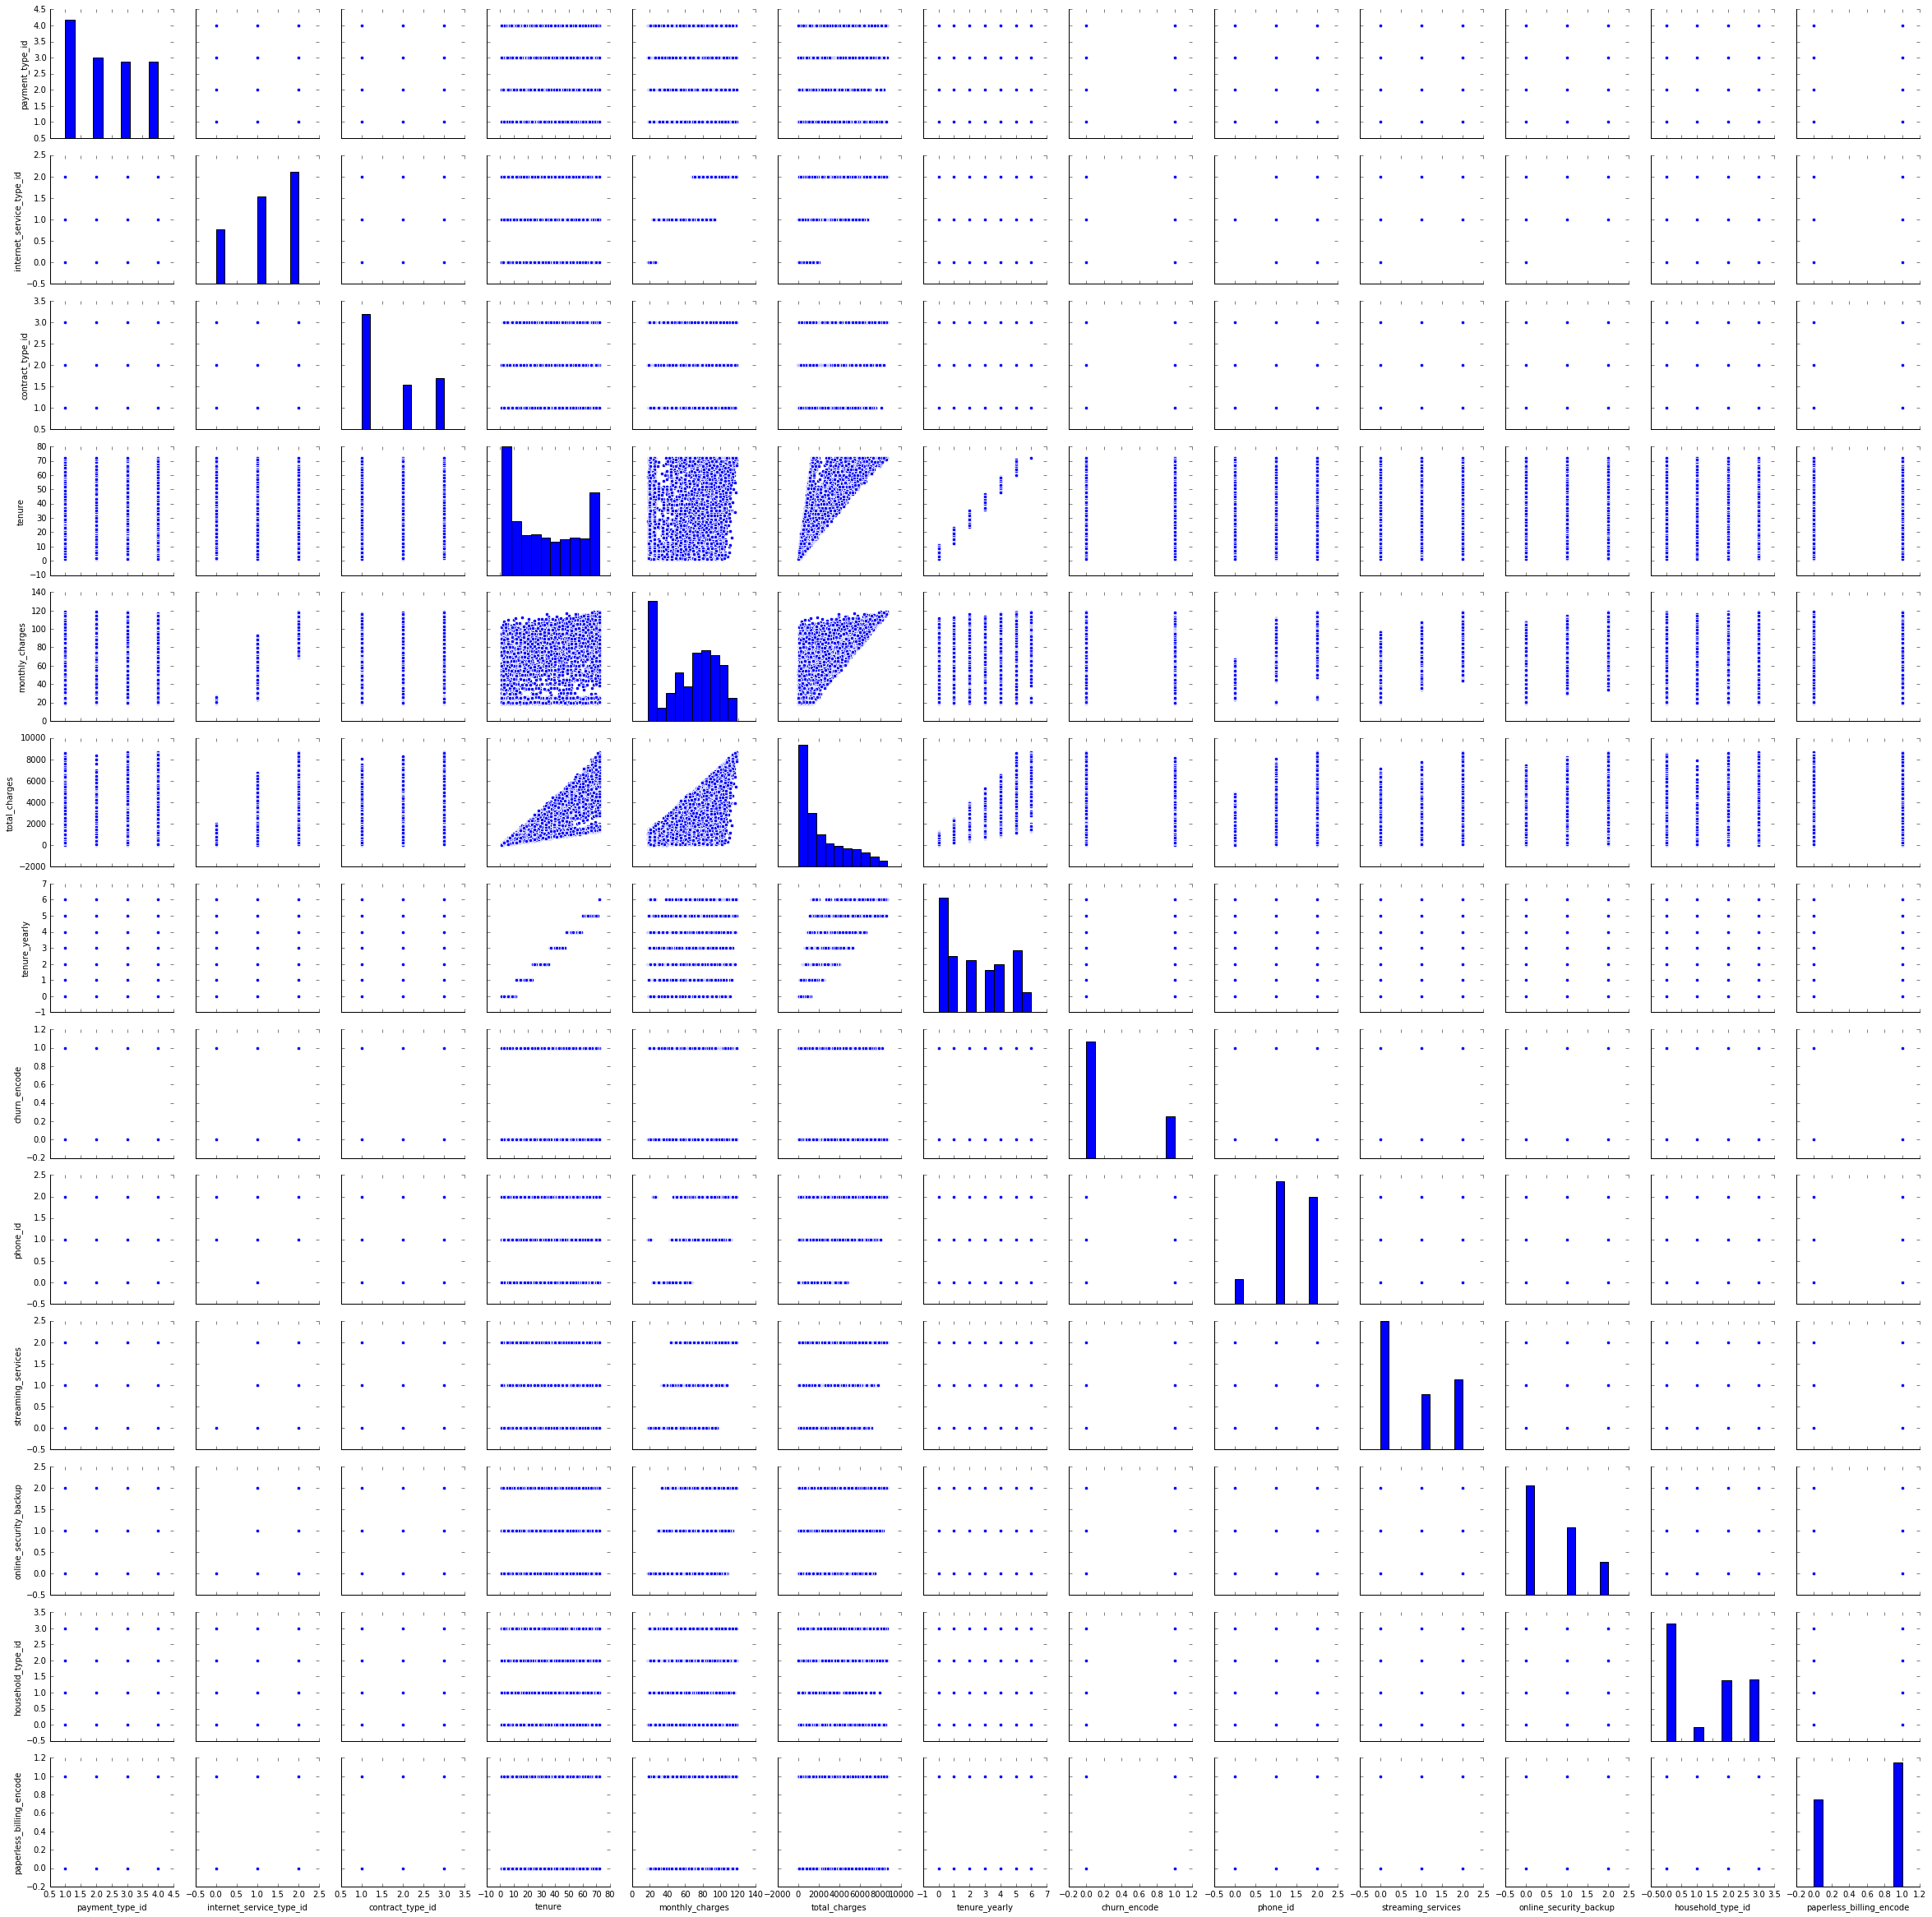

In [40]:
sns.pairplot(train[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'churn_encode', 'phone_id',
       'streaming_services', 'online_security_backup', 'household_type_id', 'paperless_billing_encode']])

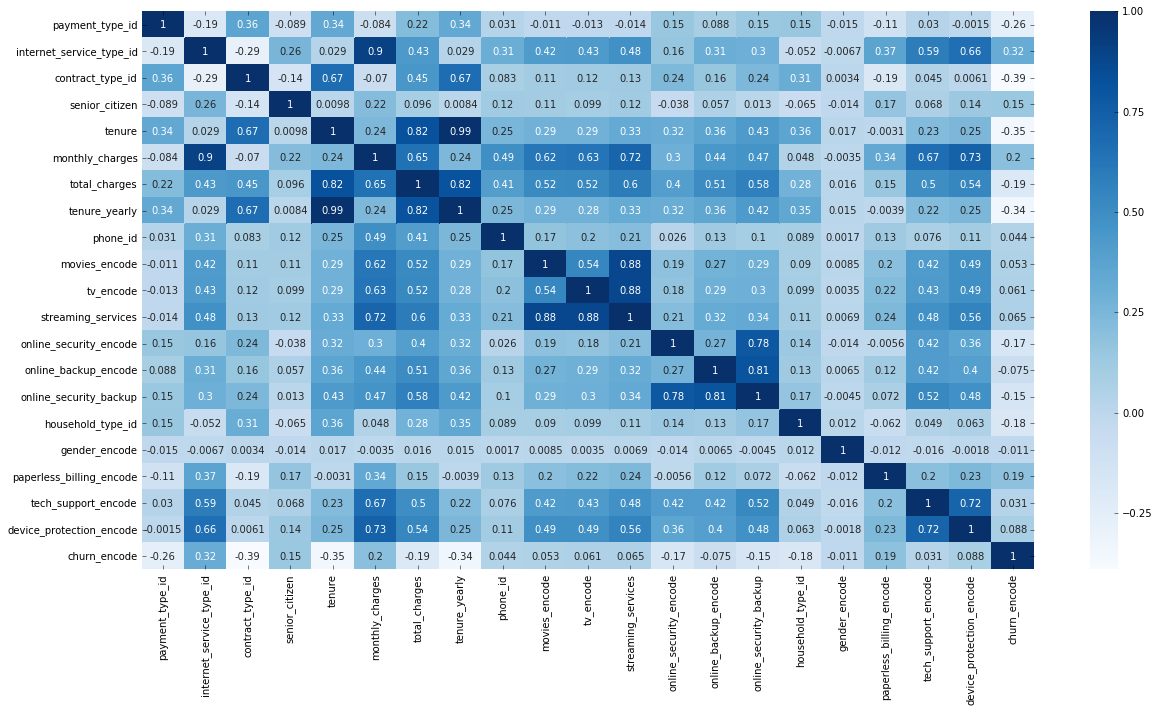

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

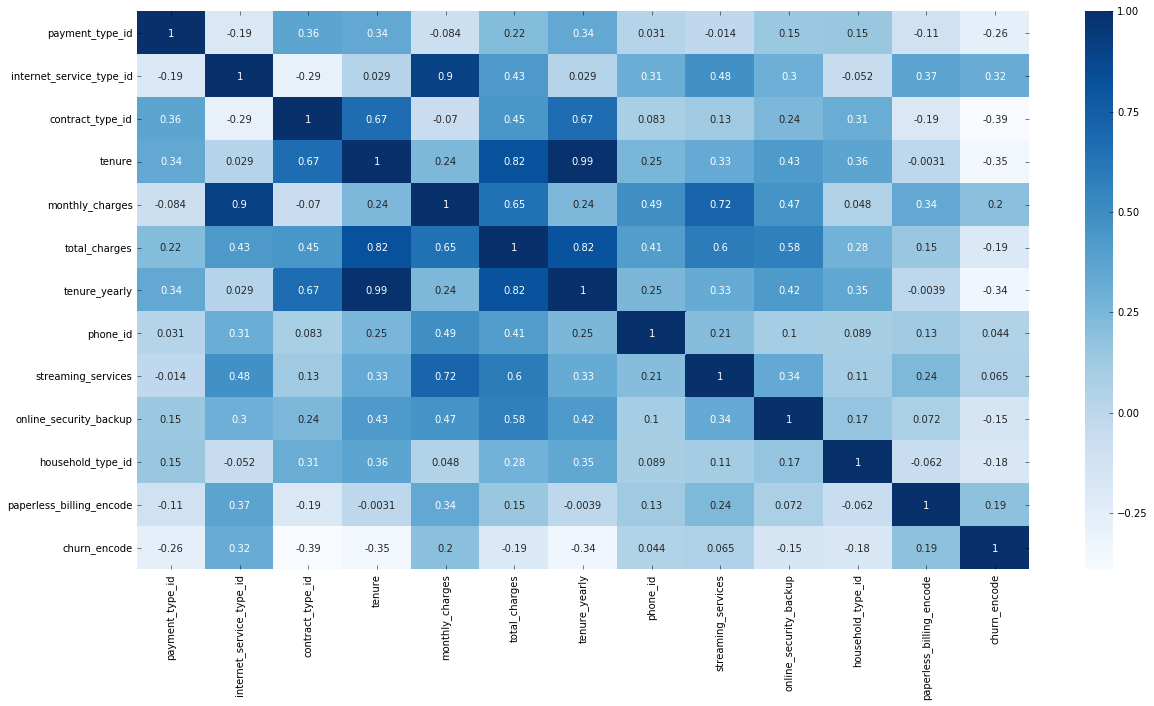

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(train[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
                   'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id',
                   'streaming_services', 'online_security_backup', 'household_type_id',
                   'paperless_billing_encode','churn_encode']].corr(), 
            cmap='Blues', annot=True)

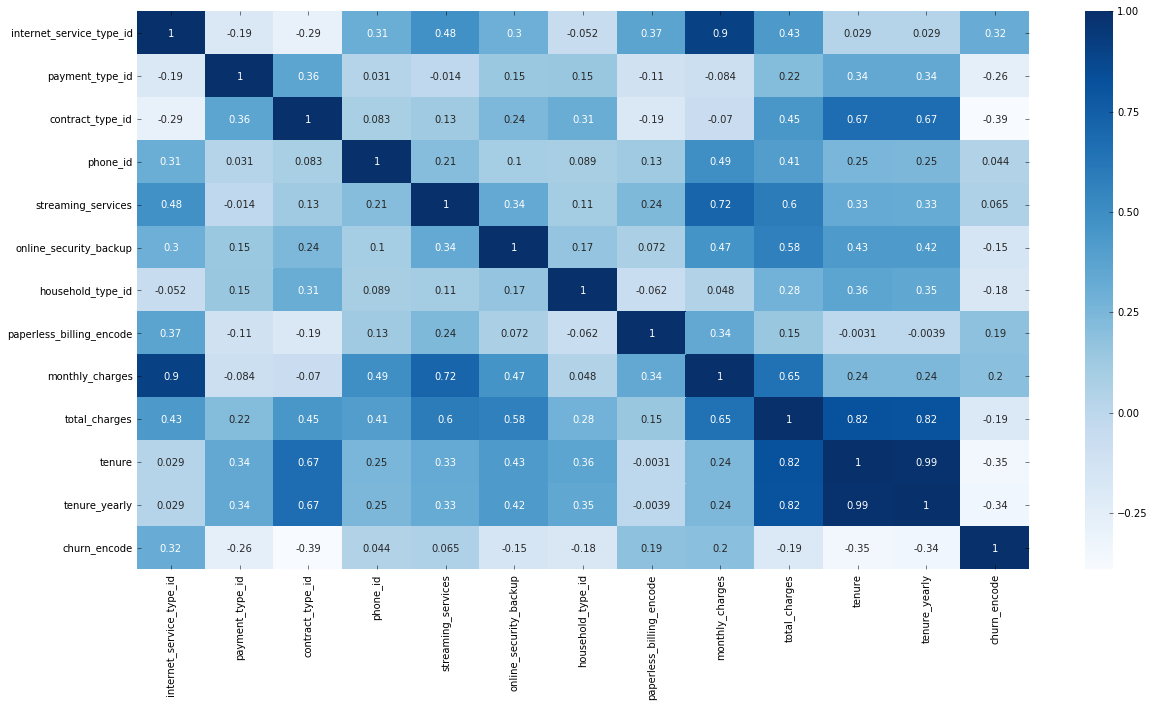

In [57]:
tenure_lt23 = train[train['tenure'] <= 23]
#df_fib_m2m = df_fiber_users[df_fiber_users['internet_service_type_id'] == 2]

plt.figure(figsize=(20,10))
sns.heatmap(train[['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                   'phone_id', 'streaming_services', 'online_security_backup', 'household_type_id',
                   'paperless_billing_encode','monthly_charges', 'total_charges', 'tenure', 'tenure_yearly',
                            'churn_encode']].corr(), 
            cmap='Blues', annot=True)

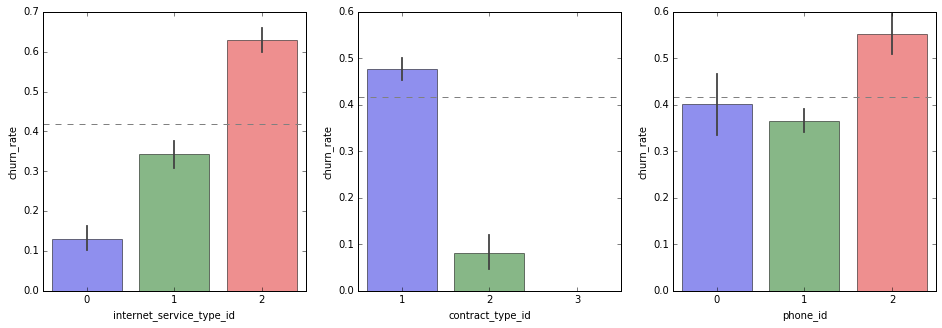

In [45]:
features = ['internet_service_type_id', 'contract_type_id', 'phone_id']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = tenure_lt23.churn_encode.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encode', data=tenure_lt23, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('churn_rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [149]:
#plt.figure(figsize=(10,5))

#churn_rate = ([train[train.churn_encode] == 1]).sum() / train.shape[0]
churn_rate = (train.churn_encode[train['churn_encode'] == 1]).sum() / train.shape[0]

sns.barplot('tenure', 'churn_encode', data=churn_rate, hue='tenure_yearly')

AttributeError: 'numpy.float64' object has no attribute 'get'

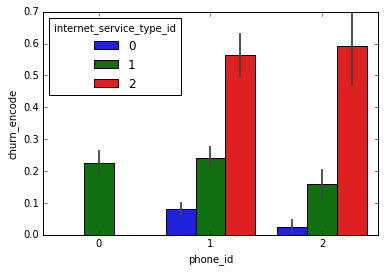

In [108]:
churn_charge_point = train[train['monthly_charges'] <= 75]
sns.barplot('phone_id', 'churn_encode', data=churn_charge_point, hue='internet_service_type_id')

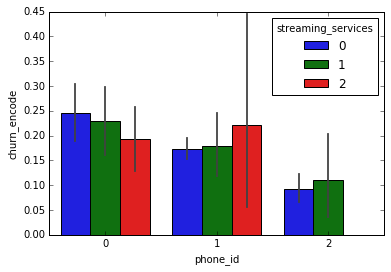

In [116]:
churn_charge_point = train[train['monthly_charges'] <= 70]
sns.barplot('phone_id', 'churn_encode', data=churn_charge_point, hue='streaming_services')

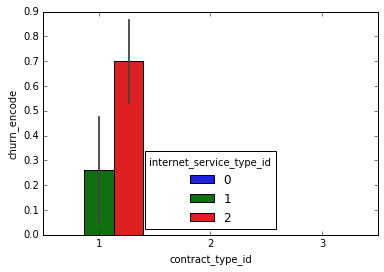

In [95]:
tenure_13 = train[train['tenure'] == 13]
sns.barplot('contract_type_id', 'churn_encode', data=tenure_13, hue='internet_service_type_id')

In [73]:
pd.crosstab(train['contract_type_id'], train.churn_encode, margins=True)
# .style.background_gradient(cmap='YlOrRd')

churn_encode,0,1,All
contract_type_id,,,
1,1550,1139,2689
2,920,119,1039
3,1155,39,1194
All,3625,1297,4922


In [ ]:
train.churn_encode.value_counts()

In [ ]:
train.churn_encode.value_counts().sum()

In [ ]:
1297/4922

In [ ]:
[[column, pearsonr(train[column], train.churn_encode)] for column in X_train]

#this generates the column name (x axes), the pearsonr and the p-value for each column (each X axes) in train df,
# in correlation with the train.final_grade (y axis)

## Logistic Regression fitting

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [ ]:
print('Columns: \n:', X_train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
y_pred

#### Probability of Stay vs Churn 

In [ ]:
y_pred_proba

#### Accuracy 

In [ ]:
(y_train['churn_encode'] == y_pred).sum() / y_train.shape[0]